# TASK 5 - Exploratory Data Analysis - IPL
#### * Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
#### * As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
#### * Suggest teams or players a company should endorse for its products.

### Author: Simsima Gafoor



In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
matches= pd.read_csv("matches.csv")
score= pd.read_csv("deliveries.csv")

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.shape

(756, 18)

In [6]:
score.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
score.shape

(179078, 21)

#### DATA INFORMATION

In [8]:

print(matches.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
print(score.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [10]:
round(100*(matches.isnull().sum()/len(matches.index)),2)

id                  0.00
season              0.00
city                0.93
date                0.00
team1               0.00
team2               0.00
toss_winner         0.00
toss_decision       0.00
result              0.00
dl_applied          0.00
winner              0.53
win_by_runs         0.00
win_by_wickets      0.00
player_of_match     0.53
venue               0.00
umpire1             0.26
umpire2             0.26
umpire3            84.26
dtype: float64

In [11]:
matches.drop('umpire3',axis=1,inplace=True)

In [12]:
matches.dropna(axis=0,inplace=True)

In [13]:
score.drop(['dismissal_kind','player_dismissed','fielder'],axis=1,inplace=True)

In [14]:
matches.dropna(axis=0,inplace=True)

In [15]:
round(100*(score.isnull().sum()/len(score.index)),2)

match_id         0.0
inning           0.0
batting_team     0.0
bowling_team     0.0
over             0.0
ball             0.0
batsman          0.0
non_striker      0.0
bowler           0.0
is_super_over    0.0
wide_runs        0.0
bye_runs         0.0
legbye_runs      0.0
noball_runs      0.0
penalty_runs     0.0
batsman_runs     0.0
extra_runs       0.0
total_runs       0.0
dtype: float64

In [16]:
matches.describe()


,id,season,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000,743.000000,743.000000
mean,1786.578735,2013.418573,0.025572,13.460296,3.375505
std,3455.045846,3.378787,0.157961,23.626205,3.393397
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,187.500000,2011.000000,0.000000,0.000000,0.000000
50%,374.000000,2013.000000,0.000000,0.000000,4.000000
75%,567.500000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [17]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [18]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                                          45
season                                    2017
city                                 Bangalore
date                                2017-05-07
team1              Royal Challengers Bangalore
team2                    Kolkata Knight Riders
toss_winner              Kolkata Knight Riders
toss_decision                            field
result                                  normal
dl_applied                                   0
winner                   Kolkata Knight Riders
win_by_runs                                  0
win_by_wickets                               6
player_of_match                      SP Narine
venue                    M Chinnaswamy Stadium
umpire1                            AY Dandekar
umpire2                          C Shamshuddin
Name: 44, dtype: object

In [19]:
matches.value_counts('win_by_wickets')

win_by_wickets
0     342
6      85
7      78
5      70
8      54
4      40
9      37
3      18
10     11
2       5
1       3
dtype: int64

In [20]:
matches.value_counts('winner')

winner
Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64

### Observation :
Mumbai Indians is the team which most won

Chennai Super Kings and Kolkata Knight Riders are 2nd , 3rd respectively

## Winner wise best Team

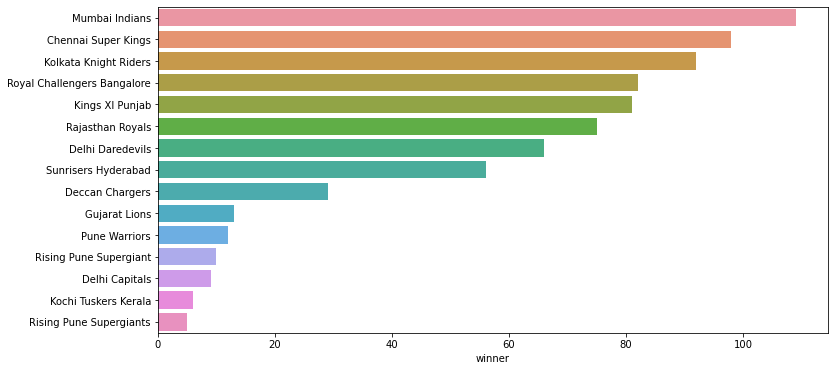

In [21]:
plt.figure(figsize=(12,6))
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

### Mumbai Indians have the majority winning. Chennai Super Kings and Kolkata Knight Riders also following in 2nd and 3rd position.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


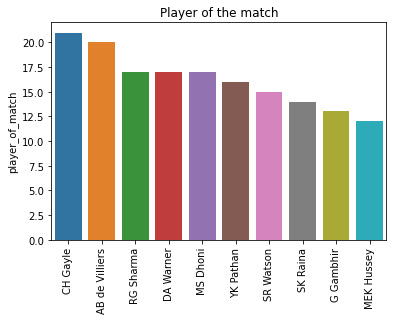

In [22]:
x = matches.player_of_match.value_counts()[:10]
sns.barplot(x.index,x)
plt.title("Player of the match")
plt.xticks(rotation=90)
plt.show()

### CH Gayle is the best player a
### Also AB de Villiers performed up to the top

In [23]:
Champions= matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
Champions


,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


## IPL CHAMPIONS

In [24]:
Champions.winner.value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

#### Mumbai Indians have won four titles. Chennai Super Kings have won three titles and Kolkata Knight Riders have won two titles, Sunrisers Hyderabad and Rajasthan Royals, apart from former team Deccan Chargers, are the other teams to have won the tournament title.

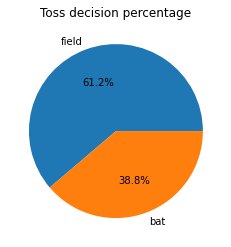

In [25]:
x=matches.toss_decision.value_counts()
labels=matches.toss_decision.unique()

plt.pie(x,explode=None,autopct='%1.1f%%',labels=labels)


plt.title("Toss decision percentage")
plt.show()

#### This graph shows most of the Captiens prefers to chose "field" first

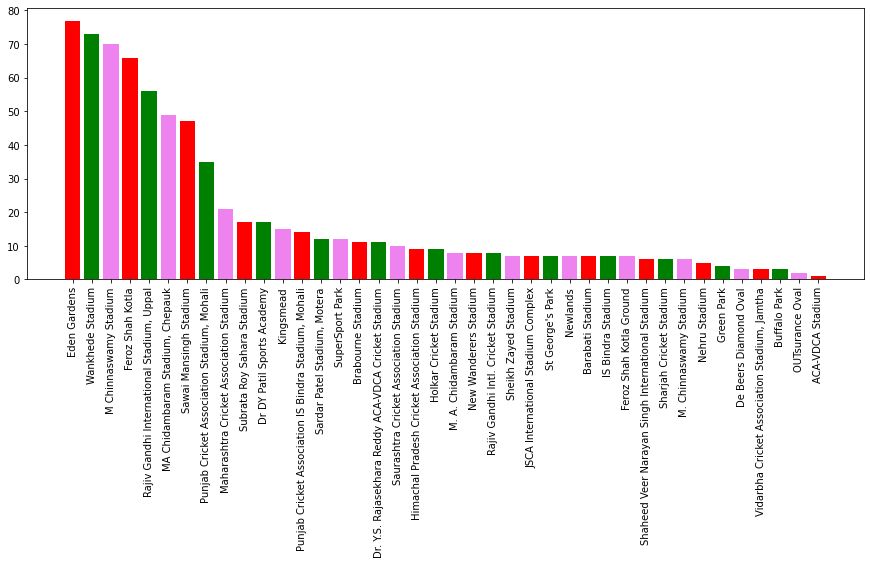

In [26]:
x=matches.venue.value_counts()
plt.figure(figsize=(15,5))
plt.bar(x.index,x,color=["red","green","violet"])
plt.xticks(rotation=90)
plt.show()


### Eden Gardens stadium conducted most matches

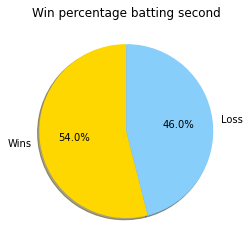

In [27]:
# Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.
num_of_wins = (matches.win_by_wickets>0).sum()
num_of_loss = (matches.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

### Most of the team won the matches when they chosen batting second 

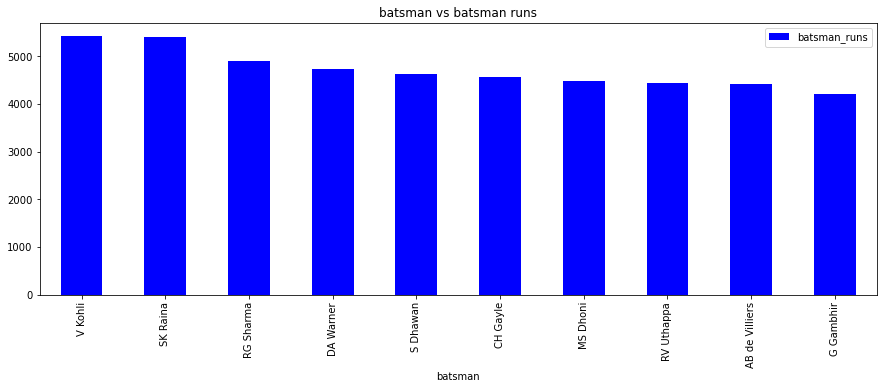

In [28]:
d1=score.groupby('batsman')[['batsman_runs']].agg('sum').sort_values(by='batsman_runs',ascending=False)[:10]
d1[:].plot.bar(color=['blue'],figsize=(15,5))
plt.title("batsman vs batsman runs")
plt.xlabel('batsman')
plt.xticks(rotation=90)
plt.show()

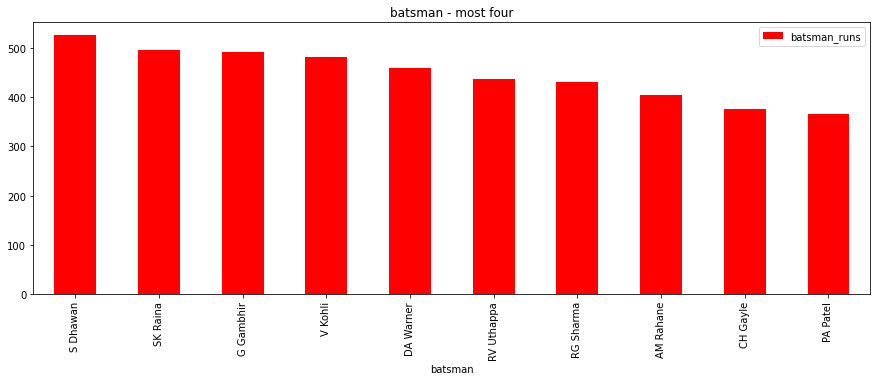

In [29]:
d1=score.groupby('batsman')[['batsman_runs']].agg(lambda x: (x==4).sum()).sort_values(by='batsman_runs',ascending=False)[:10]
d1[:].plot.bar(color=['red','green'],figsize=(15,5))
plt.title("batsman - most four")
plt.xlabel('batsman')
plt.xticks(rotation=90)
plt.show()

### S Dhavan, SK Raina, G Gambir and V Kohli scored most fours

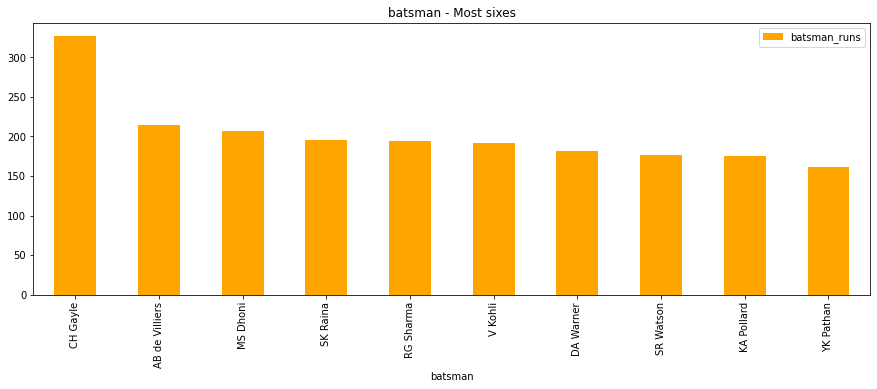

In [32]:
d1=score.groupby('batsman')[['batsman_runs']].agg(lambda x: (x==6).sum()).sort_values(by='batsman_runs',ascending=False)[:10]
d1[:].plot.bar(color=['orange'],figsize=(15,5))
plt.title("batsman - Most sixes")
plt.xlabel('batsman')
plt.xticks(rotation=90)
plt.show()

### CH Gayle, AB de Villiers and MS Dhoni scored most sixes

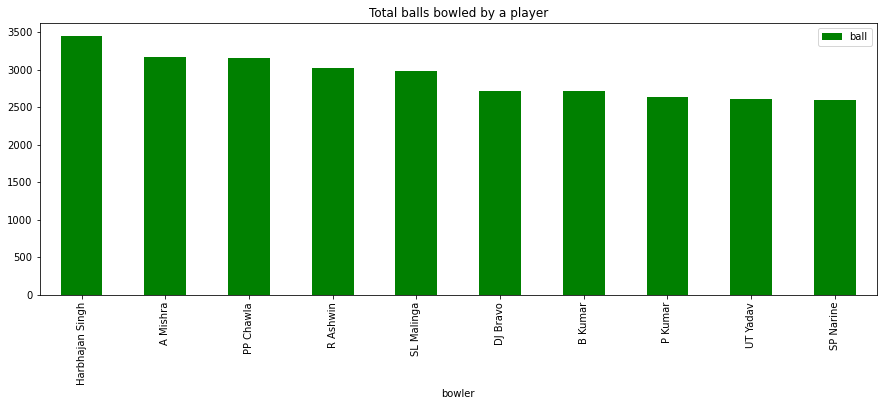

In [31]:
d1=score.groupby('bowler')[['ball']].agg('count').sort_values(by='ball',ascending=False)[:10]
d1[:].plot.bar(color=['green'],figsize=(15,5))
plt.title("Total balls bowled by a player")
plt.xlabel('bowler')
plt.xticks(rotation=90)
plt.show()

### Harbajan Sing , A Misra, and PP Chawla are the most valuable bowleer

# Conclusion

### Inferences and Conclusion

#### Let’s summarize the important observations we made during Exploratory Data Analysis:

#### Mumbai Indians is the most successful team in IPL.

#### Mumbai Indians has won the most number of toss.

#### There were more matches won by chasing the total(419 matches) than defending(350 matches).

#### When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).

##### When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.

##### The Mumbai city has hosted the most number of IPL matches.

##### Chris Gayle has won the maximum number of player of the match title.

##### Winning toss gives a slight edge(52% probability of winning) against the opponents.

##### Five Indian players have figured in the top ten IPL players list.

##### S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.

##### Eden Gardens has hosted the maximum number of IPL matches.

##### Till 2019, 40 venues have hosted 756 IPL matches